## **Problem Statement: Predicting House Prices for Optimal Real Estate Investments**

**Business Problem:**
The underlying business problem revolves around maximizing returns on real estate investments. For a real estate company or investor, accurately predicting house prices is crucial for making informed decisions on property acquisition, sales, and portfolio management. The ability to estimate property values allows for strategic investment planning, risk mitigation, and optimizing the overall financial performance of the real estate portfolio.

**Importance:**
- *Informed Decision-Making:* Accurate price predictions enable the company to make well-informed decisions on when to buy or sell properties.
- *Risk Management:* Understanding potential price fluctuations helps in mitigating risks associated with market volatility.
- *Portfolio Optimization:* Efficient allocation of resources to properties with high predicted appreciation enhances overall portfolio performance.

**Benefits:**
- *Maximized Returns:* The company can maximize returns on investment by strategically buying undervalued properties and selling overvalued ones.
- *Competitive Advantage:* Accurate predictions provide a competitive advantage by ensuring better market timing and superior investment choices.

**Data Collection:**
Relevant data for this problem can be gotten from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

**Formulation as a Machine Learning Task:**
This problem can be formulated as a regression task where the goal is to predict the sale price of a property based on its features. The machine learning model would be trained on a dataset containing historical property data, including features like property size, location, amenities, and economic indicators. The model would learn patterns and relationships from this data to make predictions on new, unseen properties.

**Evaluation Metrics:**
Common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) can be used to evaluate the performance of the machine learning model. The goal is to minimize the difference between predicted and actual sale prices.

**Implementation:**
Once the machine learning model is trained and validated, it can be integrated into the decision-making process. The company can use the model to assess the potential return on investment for prospective properties, aiding in strategic decision-making and maximizing overall portfolio value.
Solving this problem with machine learning provides a systematic and data-driven approach to real estate investment, enhancing the company's ability to thrive in a dynamic market environment.

In [ ]:
# Import warning filter
import warnings
warnings.filterwarnings(action="ignore")

# Import Data analysis tools
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Import Data visualization tool
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import utility library
import time
from tqdm import tqdm

# Set plot style
plt.style.use("ggplot")

# Importing regression models
from xgboost import XGBRegressor               # XGBoost Regressor
from catboost import CatBoostRegressor         # CatBoost Regressor
from lightgbm import LGBMRegressor             # LightGBM Regressor
from sklearn.neighbors import KNeighborsRegressor  #  KNN Model
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor

# Importing utility functions for data preprocessing and model evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Label Encoder for categorical data and Standard scaler for scalling dataset

from sklearn.model_selection import train_test_split, KFold  # Train-test split and K-Fold cross-validation

# Importing utility functions for model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Regression metrics

In [ ]:
# Load dataset to memory
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Drop Id columns cause it's not useful for our modelling
train.drop("Id", axis="columns", inplace=True)
test.drop("Id", axis="columns", inplace=True)

# Display the shape of the dataset
print(f"Train Shape: {train.shape}\nTest Shape: {test.shape}")

Train Shape: (1460, 80)
Test Shape: (1459, 79)


In [ ]:
# Timer decorator
def timer(function):
    def run_func(*x, **y):
        start_time = time.time()
        result = function(*x, **y)
        runtime = time.time() - start_time
        print(f"Elapsed time for '{function.__name__} function': {runtime} seconds")
        return result
    return run_func

In [ ]:
# Display information about the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# Display information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
# Display the discriptive information about the train dataset
train.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000

In [ ]:
# Display the discriptive information about the test dataset
test.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,565,1444.000000,1459,1459,1459,1415,1414,1415,1417,1458.000000,1417,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,729,1383,1381.000000,1381,1458.000000,1458.000000,1381,1381,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,13,15,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,434,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,364,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.0

In [ ]:
# Check for missing values in the train dataset
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
# Check for missing values in the test dataset
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [ ]:
# Function to drop columns with missing values greater than or equal to threshold
@timer
def drop_columns(data, threshold):
    percentageofmissingvalues = (data.isnull().sum()/data.shape[0] * 100).to_dict()
    drop_cols = [col_name for (col_name, val) in percentageofmissingvalues.items() if val >= threshold]
    data.drop(drop_cols, axis="columns", inplace=True)
    return data

In [ ]:
# Make copy of the dataset
X = train.copy()
x = test.copy()

In [ ]:
# Drop columns that have missing values greater than 70%
X = drop_columns(X, 70)
x = drop_columns(x, 70)

Elapsed time for 'drop_columns function': 0.012299060821533203 seconds
Elapsed time for 'drop_columns function': 0.011294126510620117 seconds


In [ ]:
# Check for missing values in training dataset
X.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [ ]:
# Check for missing values in test dataset
x.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 75, dtype: int64

**Observations**: There are still missing values in some columns. The missing values will be treated after further investigations.

In [ ]:
# MSSubClass can be treated as a categorical column
MSSubClass = {
                20 : "1-STORY 1946 & NEWER ALL STYLES",
                30 : "1-STORY 1945 & OLDER",
                40 : "1-STORY W/FINISHED ATTIC ALL AGES",
                45 : "1-1/2 STORY - UNFINISHED ALL AGES",
                50 : "1-1/2 STORY FINISHED ALL AGES",
                60 : "2-STORY 1946 & NEWER",
                70 : "2-STORY 1945 & OLDER",
                75 : "2-1/2 STORY ALL AGES",
                80 : "SPLIT OR MULTI-LEVEL",
                85 : "SPLIT FOYER",
                90 : "DUPLEX - ALL STYLES AND AGES",
               120 : "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
               150 : "1-1/2 STORY PUD - ALL AGES",
               160 : "2-STORY PUD - 1946 & NEWER",
               180 : "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
               190 : "2 FAMILY CONVERSION - ALL STYLES AND AGES"
            }

# OverallQual, OverallCond can be treated as a categorical column
OverallQual = OverallCond = {
                    10 : "Very Excellent",
                       9 : "Excellent",
                       8 : "Very Good",
                       7 : "Good",
                       6 : "Above Average",
                       5 : "Average",
                       4 : "Below Average",
                       3 : "Fair",
                       2 : "Poor",
                       1 : "Very Poor"
}


for col_name, col_value in zip(["MSSubClass", "OverallQual", "OverallCond"], [MSSubClass, OverallQual, OverallCond]):
    X[col_name] = X[col_name].map(col_value)
    x[col_name] = x[col_name].map(col_value)

# Display the first 5 rows
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Handling missing values

In [ ]:
# Handling missing values for training dataset

X.drop(X[X["Electrical"].isnull()].index, axis="index", inplace=True)
X["LotFrontage"] = X["LotFrontage"].fillna(-999)
X["MasVnrType"] = X["MasVnrType"].fillna("None")
X["MasVnrArea"] = X["MasVnrArea"].fillna(-999)
X["BsmtQual"] = X["BsmtQual"].fillna("NA")
X["BsmtCond"] = X["BsmtCond"].fillna("NA")
X["BsmtExposure"] = X["BsmtExposure"].fillna("NA")
X["BsmtFinType1"] = X["BsmtFinType1"].fillna("NA")
X["BsmtFinType2"] = X["BsmtFinType2"].fillna("NA")
X["FireplaceQu"] = X["FireplaceQu"].fillna("NA")
X["GarageType"] = X["GarageType"].fillna("NA")
X["GarageYrBlt"] = X["GarageYrBlt"].fillna(-999)
X["GarageFinish"] = X["GarageFinish"].fillna("NA")
X["GarageQual"] = X["GarageQual"].fillna("NA")
X["GarageCond"] = X["GarageCond"].fillna("NA")

# Handling missing values for test dataset

x.drop(x[x["Electrical"].isnull()].index, axis="index", inplace=True)
x["LotFrontage"] = x["LotFrontage"].fillna(-999)
x["MasVnrType"] = x["MasVnrType"].fillna("None")
x["MasVnrArea"] = x["MasVnrArea"].fillna(-999)
x["BsmtQual"] = x["BsmtQual"].fillna("NA")
x["BsmtCond"] = x["BsmtCond"].fillna("NA")
x["BsmtExposure"] = x["BsmtExposure"].fillna("NA")
x["BsmtFinType1"] = x["BsmtFinType1"].fillna("NA")
x["BsmtFinType2"] = x["BsmtFinType2"].fillna("NA")
x["FireplaceQu"] = x["FireplaceQu"].fillna("NA")
x["GarageType"] = x["GarageType"].fillna("NA")
x["GarageYrBlt"] = x["GarageYrBlt"].fillna(-999)
x["GarageFinish"] = x["GarageFinish"].fillna("NA")
x["GarageQual"] = x["GarageQual"].fillna("NA")
x["GarageCond"] = x["GarageCond"].fillna("NA")

### Data Visualization

In [ ]:
@timer
def countplot_func_2by2(X, figsize, columns):
    # Conditional statement to check if the number of columns equals to 4
    if (len(columns) > 4) | (len(columns) < 4):
        raise("The number of columns must be equal to 4")
    else:
        pass

    # Create Subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    axes = axes.flatten()

    for (idx, col) in enumerate(columns):
        countplot = sns.countplot(data=X, x=col, ax=axes[idx])
        # Add text to plot
        for patch in countplot.patches:
            height = patch.get_height() / 1000
            countplot.text(patch.get_x() + (patch.get_width()/2), height, f"{height:.2f}k", va="bottom", ha="center")
        # Add titles to the plots
        countplot.set_title(col.upper())
        countplot.set_ylabel("Value Count")
        countplot.set_xlabel("")

    plt.tight_layout()
    plt.show()

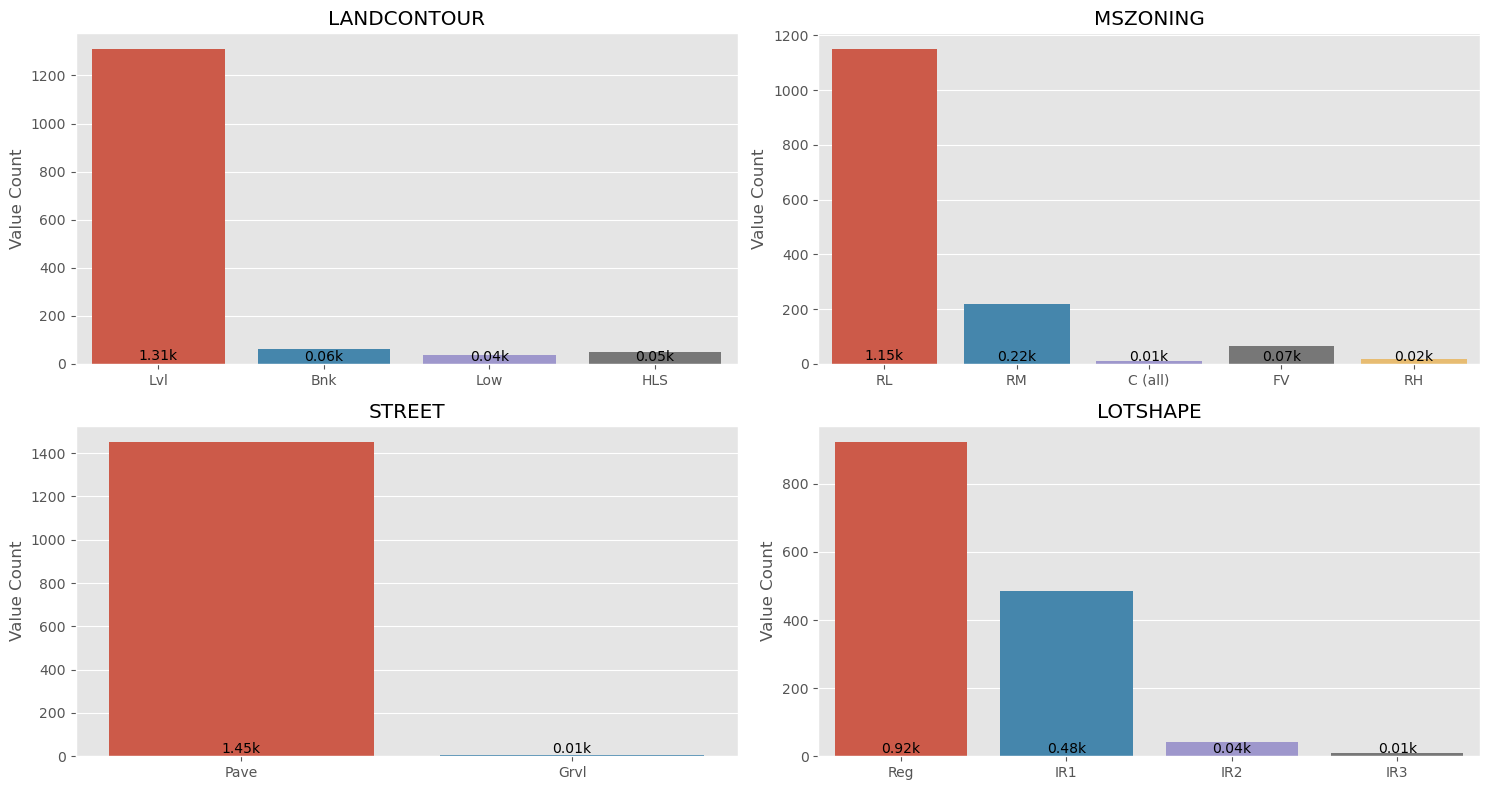

Elapsed time for 'countplot_func_2by2 function': 2.211373805999756 seconds


In [ ]:
countplot_func_2by2(X, (15, 8), ["LandContour", "MSZoning", "Street", "LotShape"])

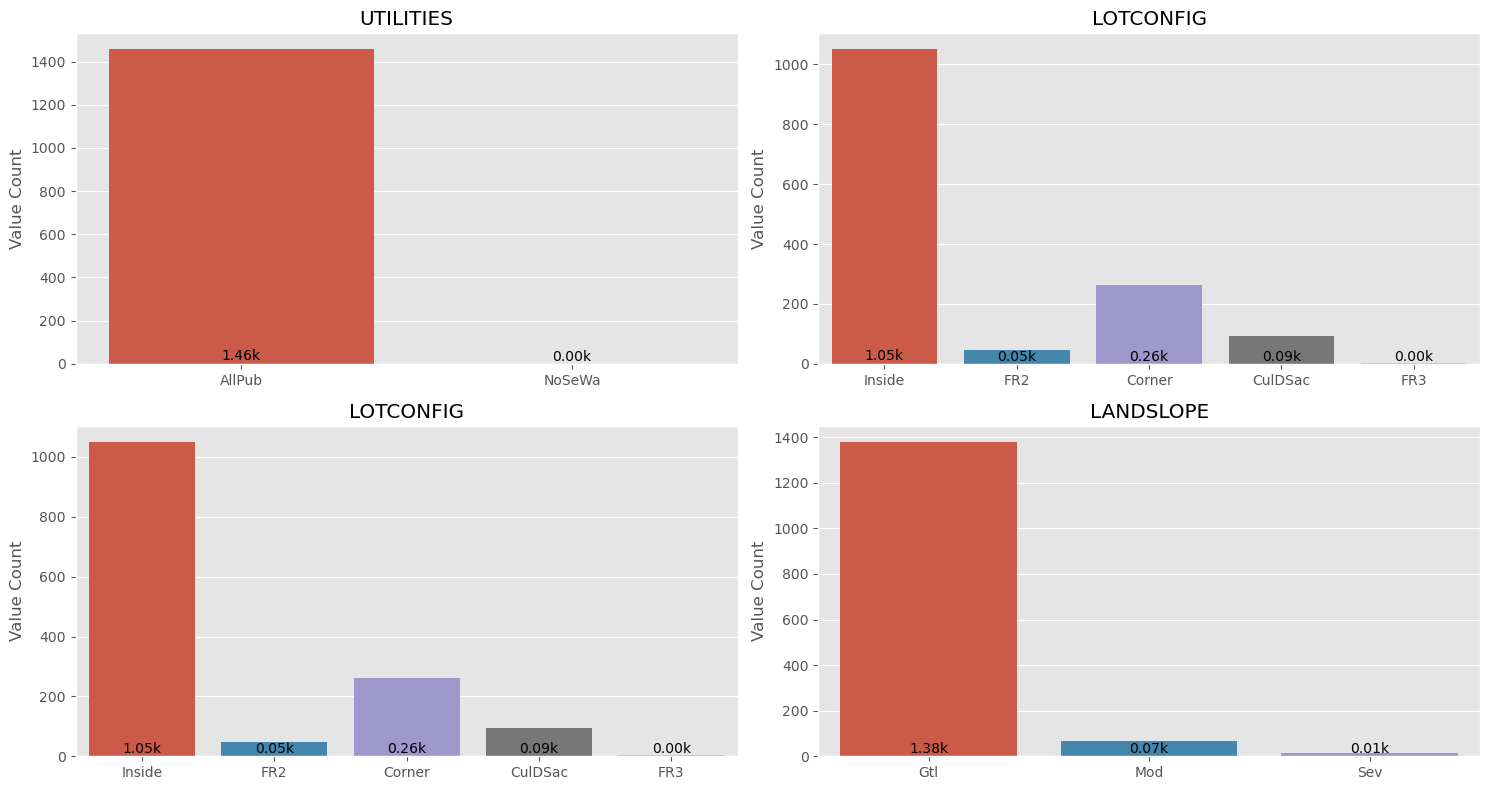

Elapsed time for 'countplot_func_2by2 function': 1.9684865474700928 seconds


In [ ]:
countplot_func_2by2(X, (15, 8), ["Utilities", "LotConfig", "LotConfig", "LandSlope"])

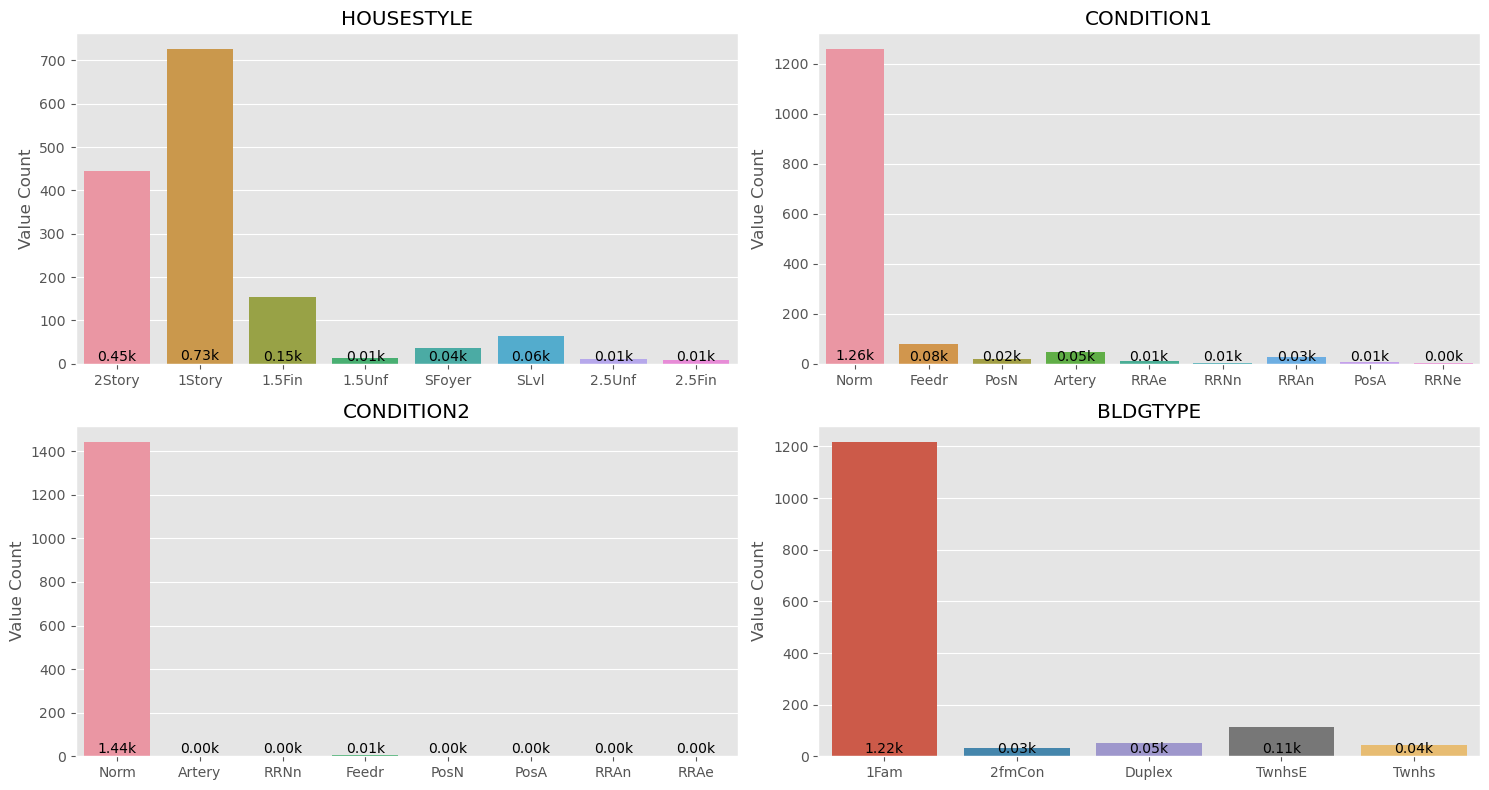

Elapsed time for 'countplot_func_2by2 function': 1.8579471111297607 seconds


In [ ]:
countplot_func_2by2(X, (15, 8), ["HouseStyle", "Condition1", "Condition2", "BldgType"])

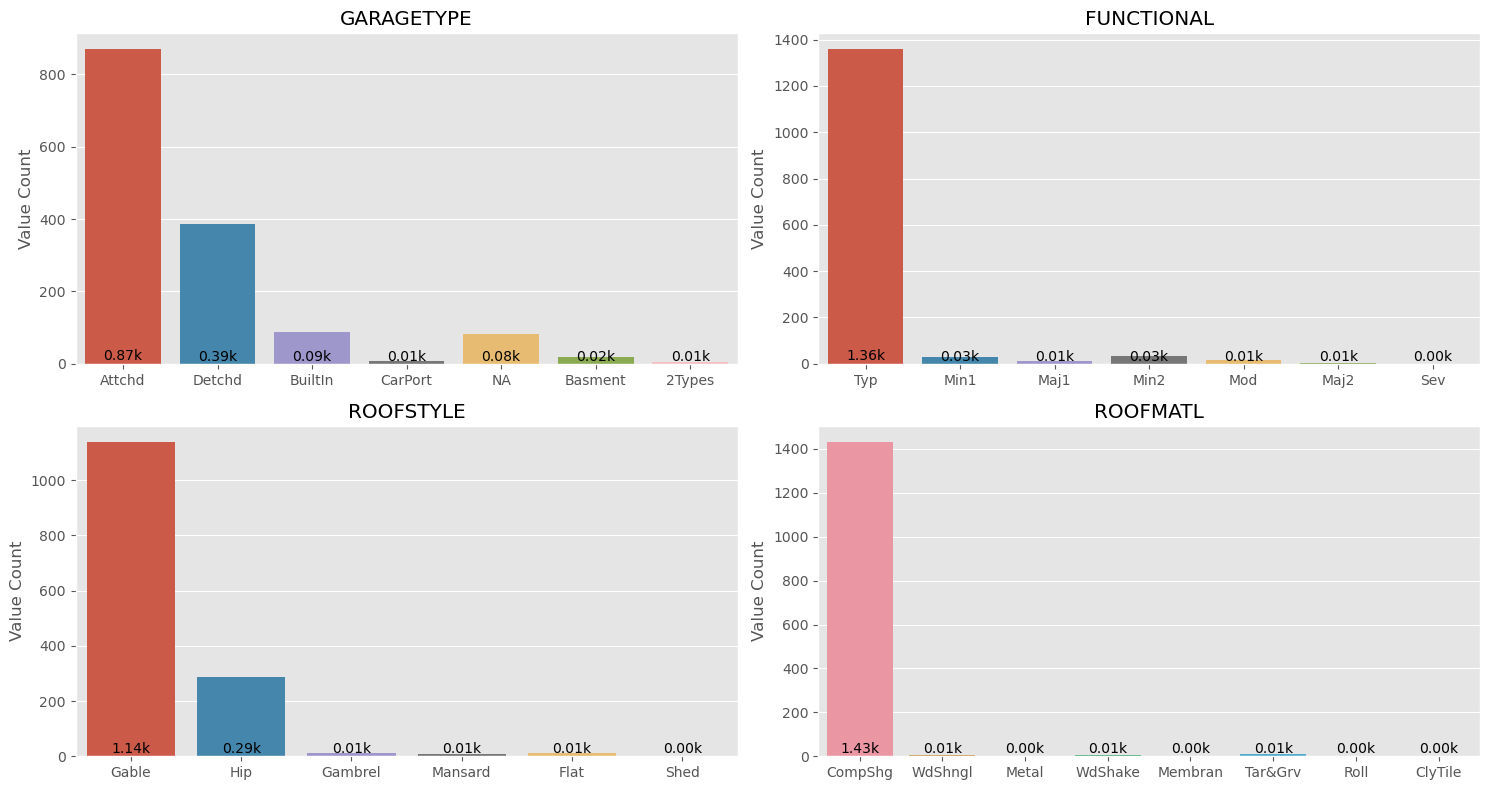

Elapsed time for 'countplot_func_2by2 function': 1.8138155937194824 seconds


In [ ]:
countplot_func_2by2(X, (15, 8), ["GarageType", "Functional", "RoofStyle", "RoofMatl"])

In [ ]:
@timer
def distplot_3by3(X, figsize, columns):
    # Conditional statement to check if the number of columns equals to 4
    if (len(columns) > 9) | (len(columns) < 9):
        raise("The number of columns must be equal to 4")
    else:
        pass

    # Create Subplots
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=figsize)
    axes = axes.flatten()

    for (idx, col) in enumerate(columns):
        countplot = sns.distplot(X[col], ax=axes[idx])
        countplot.set_title(col.upper())
        countplot.set_ylabel("Value Count")
        countplot.set_xlabel("")

    plt.tight_layout()
    plt.show()

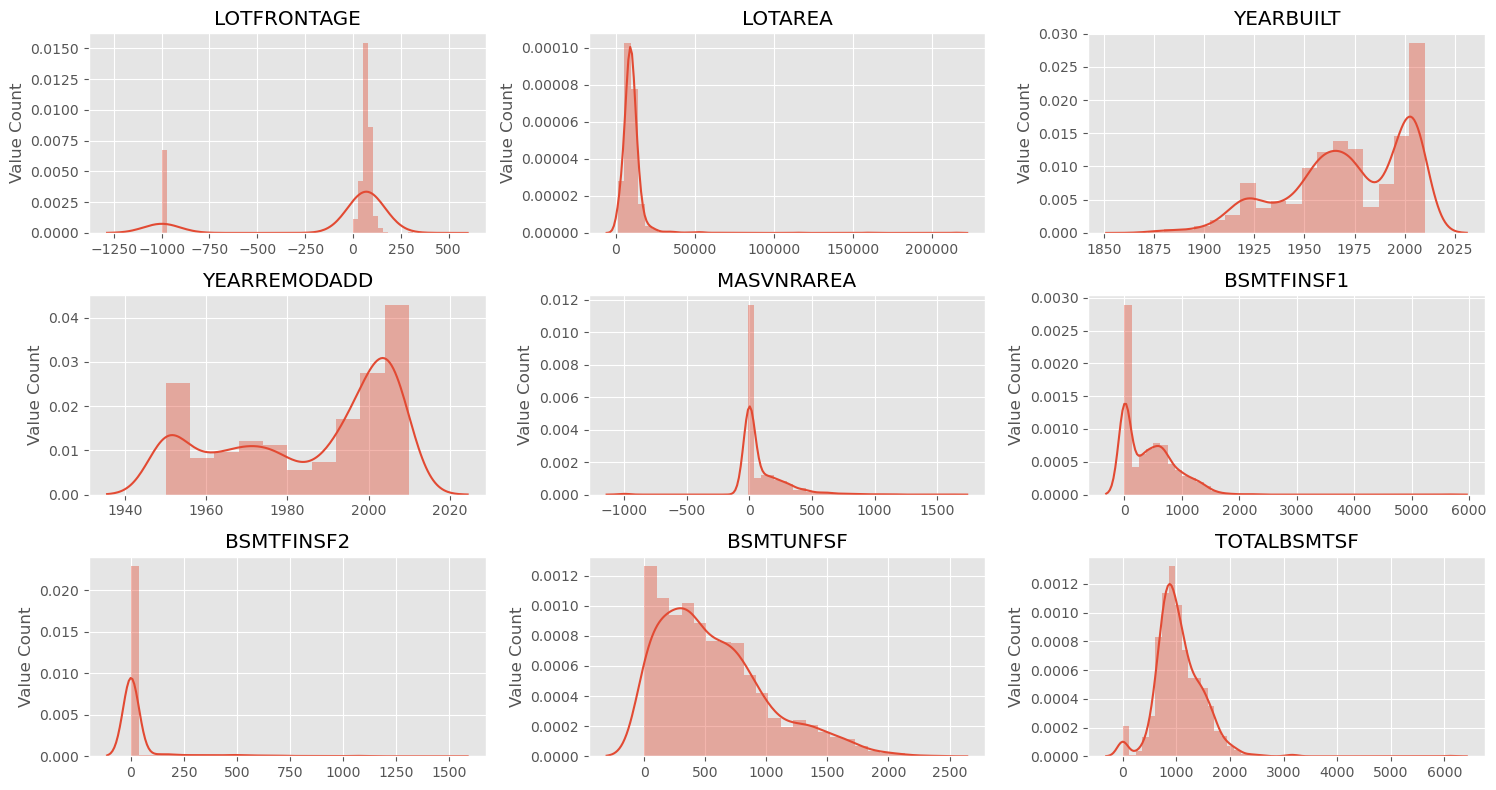

Elapsed time for 'distplot_3by3 function': 5.7898170948028564 seconds


In [ ]:
distplot_3by3(X, (15, 8), X.select_dtypes(exclude="O").columns[0:9])

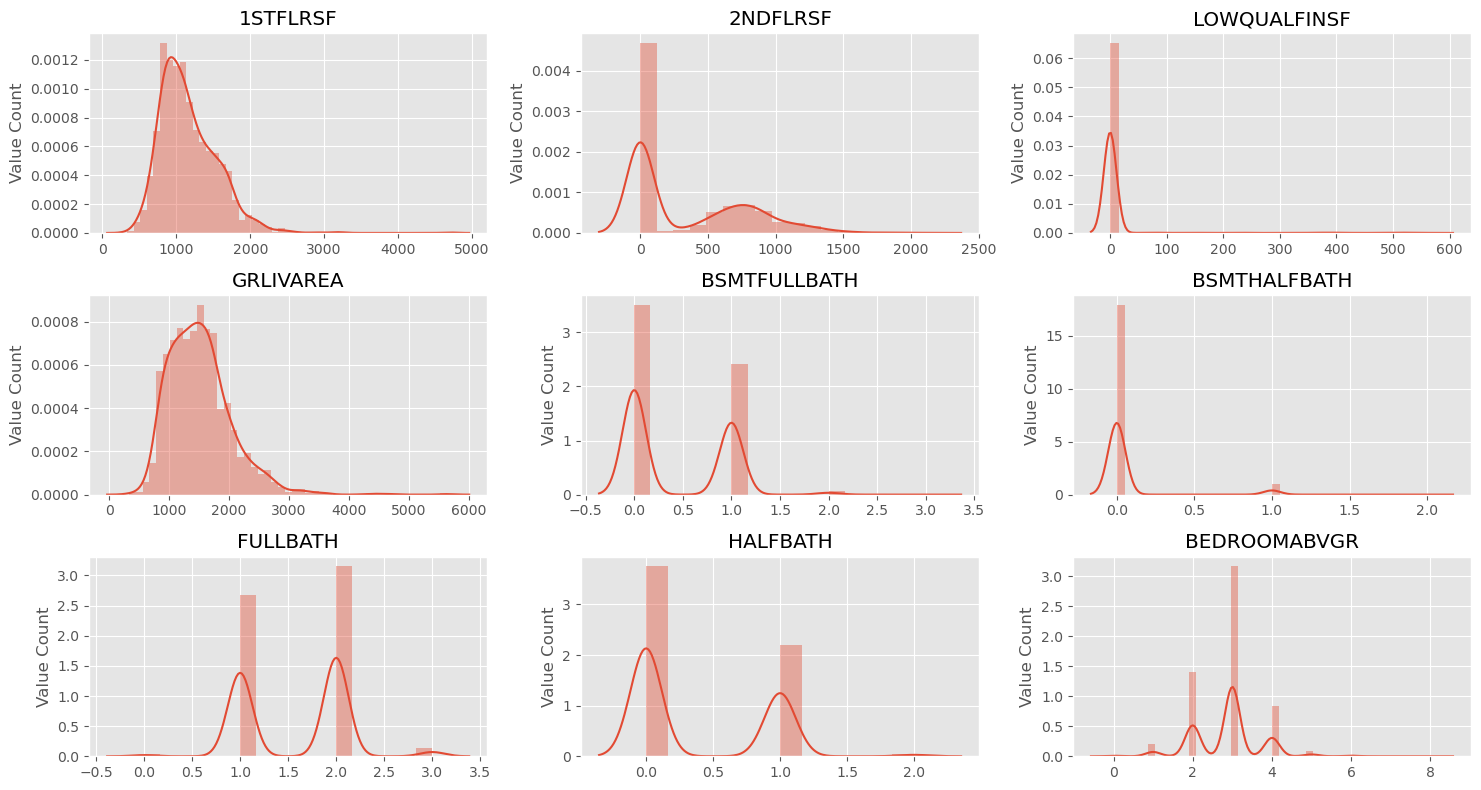

Elapsed time for 'distplot_3by3 function': 5.198203802108765 seconds


In [ ]:
distplot_3by3(X, (15, 8), X.select_dtypes(exclude="O").columns[9:18])

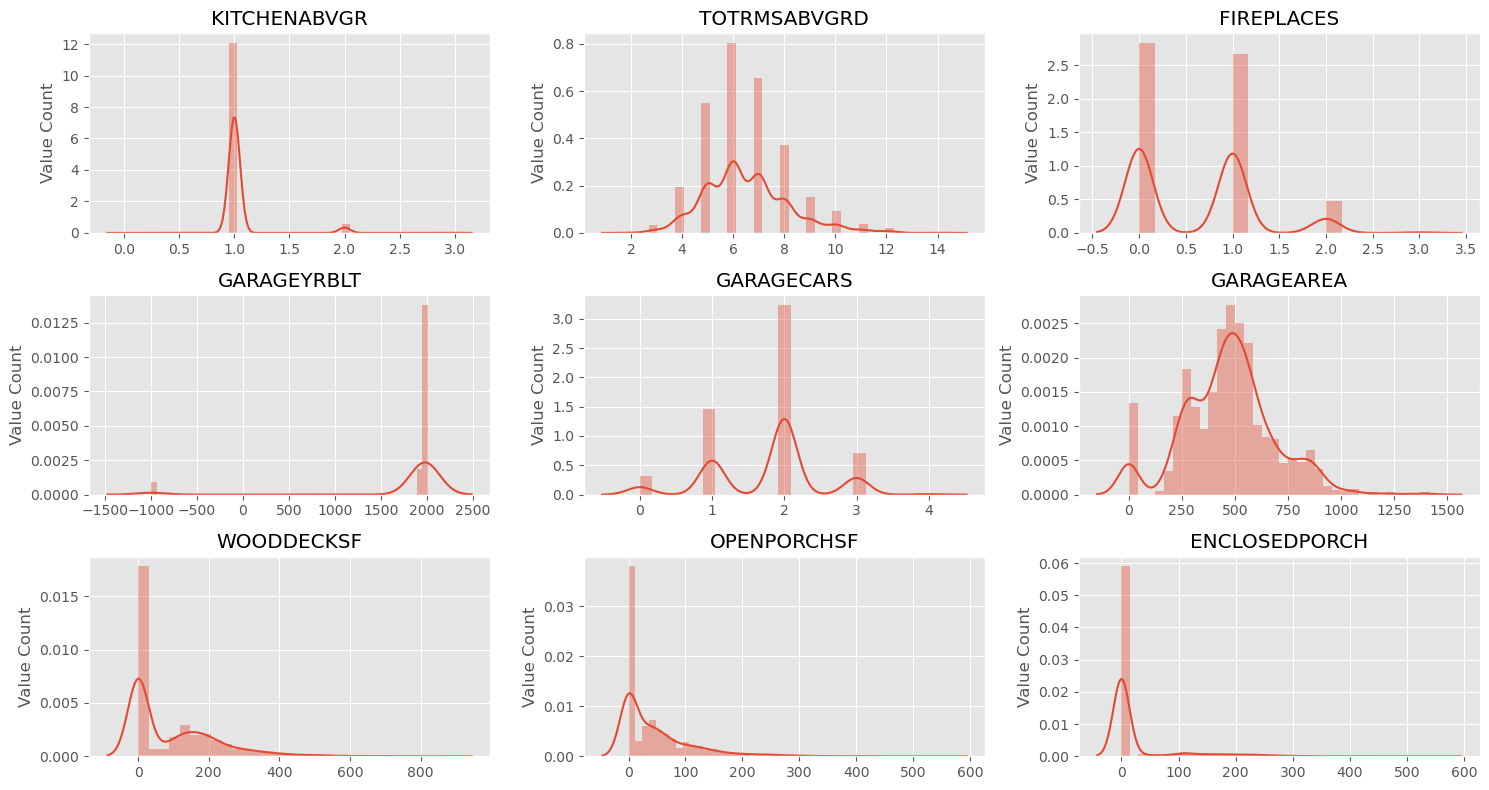

Elapsed time for 'distplot_3by3 function': 5.904768466949463 seconds


In [ ]:
distplot_3by3(X, (15, 8), X.select_dtypes(exclude="O").columns[18:27])

### Data Preprocessing

In [ ]:
@timer
def preprocess_data(data):
    # Label encode categorical column
    encoder = LabelEncoder()
    cat_col = data.select_dtypes(include="O").columns
    for col in cat_col:
        data[col] = encoder.fit_transform(data[col])

    standard_scaler = StandardScaler()

    scaled_data = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

    return scaled_data

In [ ]:
scaled_X = preprocess_data(X.drop("SalePrice", axis="columns"))
scaled_x = preprocess_data(x)

Elapsed time for 'preprocess_data function': 0.09013867378234863 seconds
Elapsed time for 'preprocess_data function': 0.07379627227783203 seconds


### Building baseline models

In [ ]:
from xgboost import XGBRegressor               # XGBoost Regressor
from catboost import CatBoostRegressor         # CatBoost Regressor
from lightgbm import LGBMRegressor             # LightGBM Regressor
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor


In [ ]:
# Split dataset for training

xtrain, xtest, ytrain, ytest = train_test_split(scaled_X, X["SalePrice"], test_size=0.1, random_state=42)

In [ ]:
# Create a list to store all the models
listofmodels = [LinearRegression, RandomForestRegressor, KNeighborsRegressor, LGBMRegressor, CatBoostRegressor, XGBRegressor]

In [ ]:
@timer
def train_model(X, y, X_valid, y_valid, listofmodels):
    modelperformanceontrain, modelperformanceonvalid, modelnames, trained_models = [], [], [], []
    for model in tqdm(listofmodels):
        if model.__name__ in ["XGBRegressor", "LGBMRegressor"]:
            init_model = model(verbosity=0) # Load model
        elif model.__name__ == "CatBoostRegressor":
            init_model = model(logging_level='Silent')
        else:
            init_model = model()# Load model

        init_model.fit(X, y)
        pred_train = init_model.predict(X)
        pred_valid = init_model.predict(X_valid)
        # Performance on training set
        modelperformanceontrain.append((mean_absolute_error(y, pred_train),\
                                   mean_squared_error(y, pred_train), np.sqrt(mean_squared_error(y, pred_train))))
        # Performance on test set
        modelperformanceonvalid.append((mean_absolute_error(y_valid, pred_valid),\
                                   mean_squared_error(y_valid, pred_valid), np.sqrt(mean_squared_error(y_valid, pred_valid))))

        # Store the models name in a list
        modelnames.append(model.__name__)

        # Store all the trained models in a list
        trained_models.append(init_model)

    output1 = pd.DataFrame(modelperformanceontrain, index=modelnames, columns=["MAE", "MSE", "RMSE"]).reset_index()
    output2 = pd.DataFrame(modelperformanceonvalid, index=modelnames, columns=["MAE", "MSE", "RMSE"]).reset_index()

    return output1.rename({"index":"model"}, axis="columns"), output2.rename({"index":"model"}, axis="columns"), trained_models

In [ ]:
TRAIN_RESULT, TEST_RESULT, trained_model = train_model(xtrain, ytrain, xtest, ytest, listofmodels)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:29<00:00,  4.98s/it]

Elapsed time for 'train_model function': 29.91024899482727 seconds


In [ ]:
@timer
def plot_result(data):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    ax = ax.flatten()
    # Plot columns
    for idx, col in enumerate(data.columns[1:]):
        barplot = sns.barplot(data=data, x="model", y=col, ax=ax[idx])
        barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')
        barplot.set_xlabel("")
        barplot.set_title(f"{col} for each model")
    # Delete excess axis
    fig.delaxes(ax[-1])
    plt.tight_layout()
    plt.show()

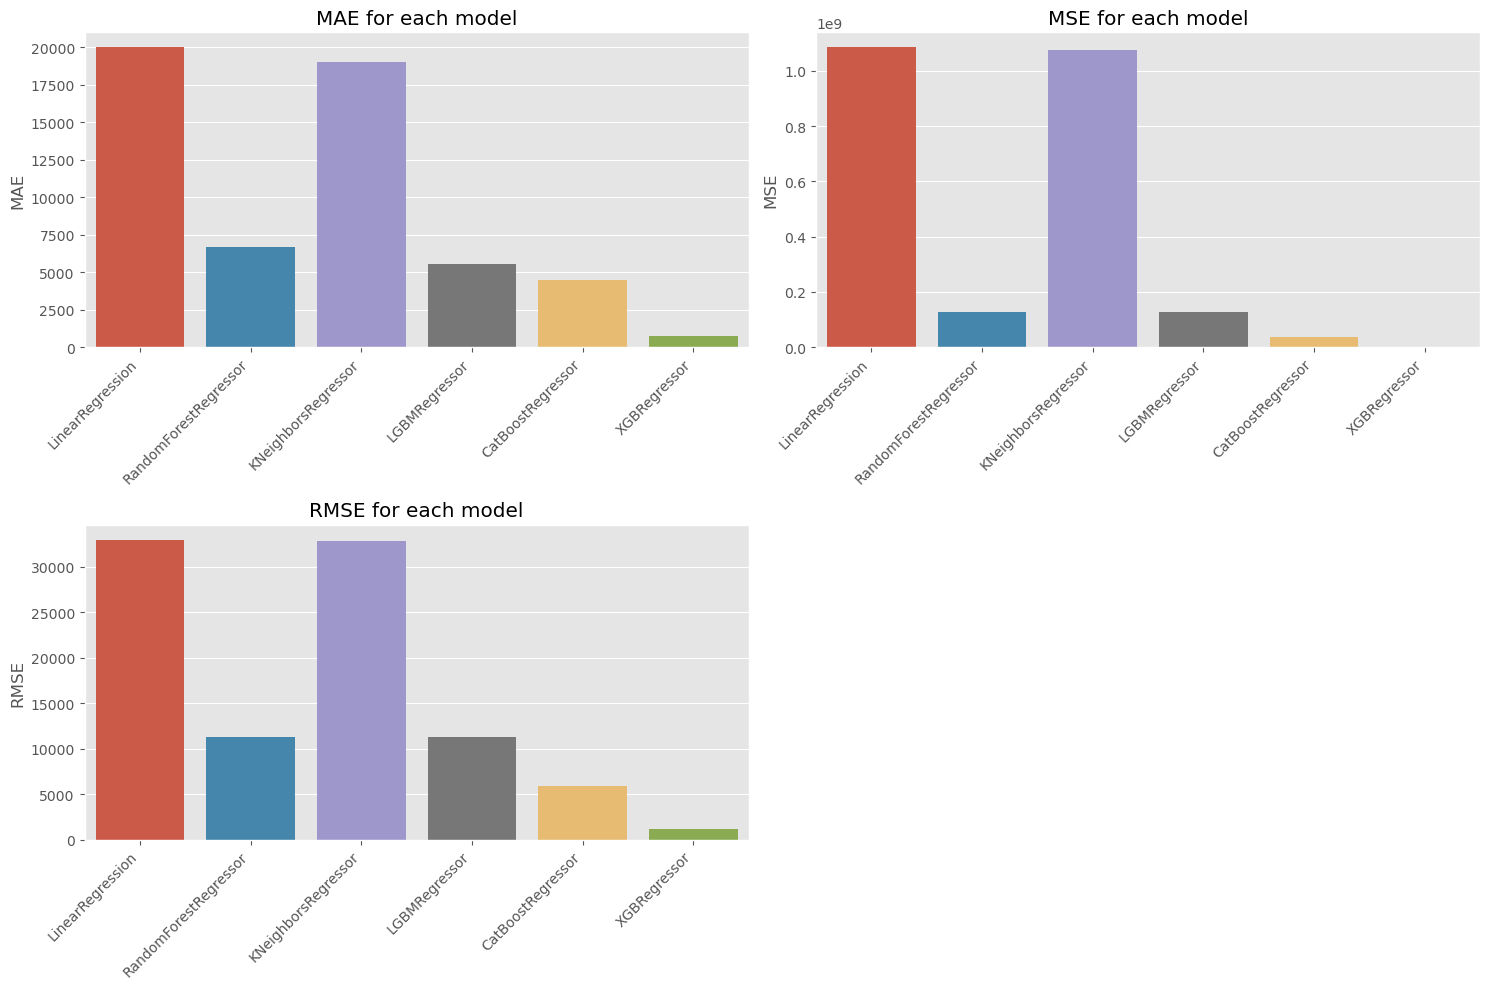

Elapsed time for 'plot_result function': 1.3222119808197021 seconds


In [ ]:
# Plot result for Training dataset
plot_result(TRAIN_RESULT)

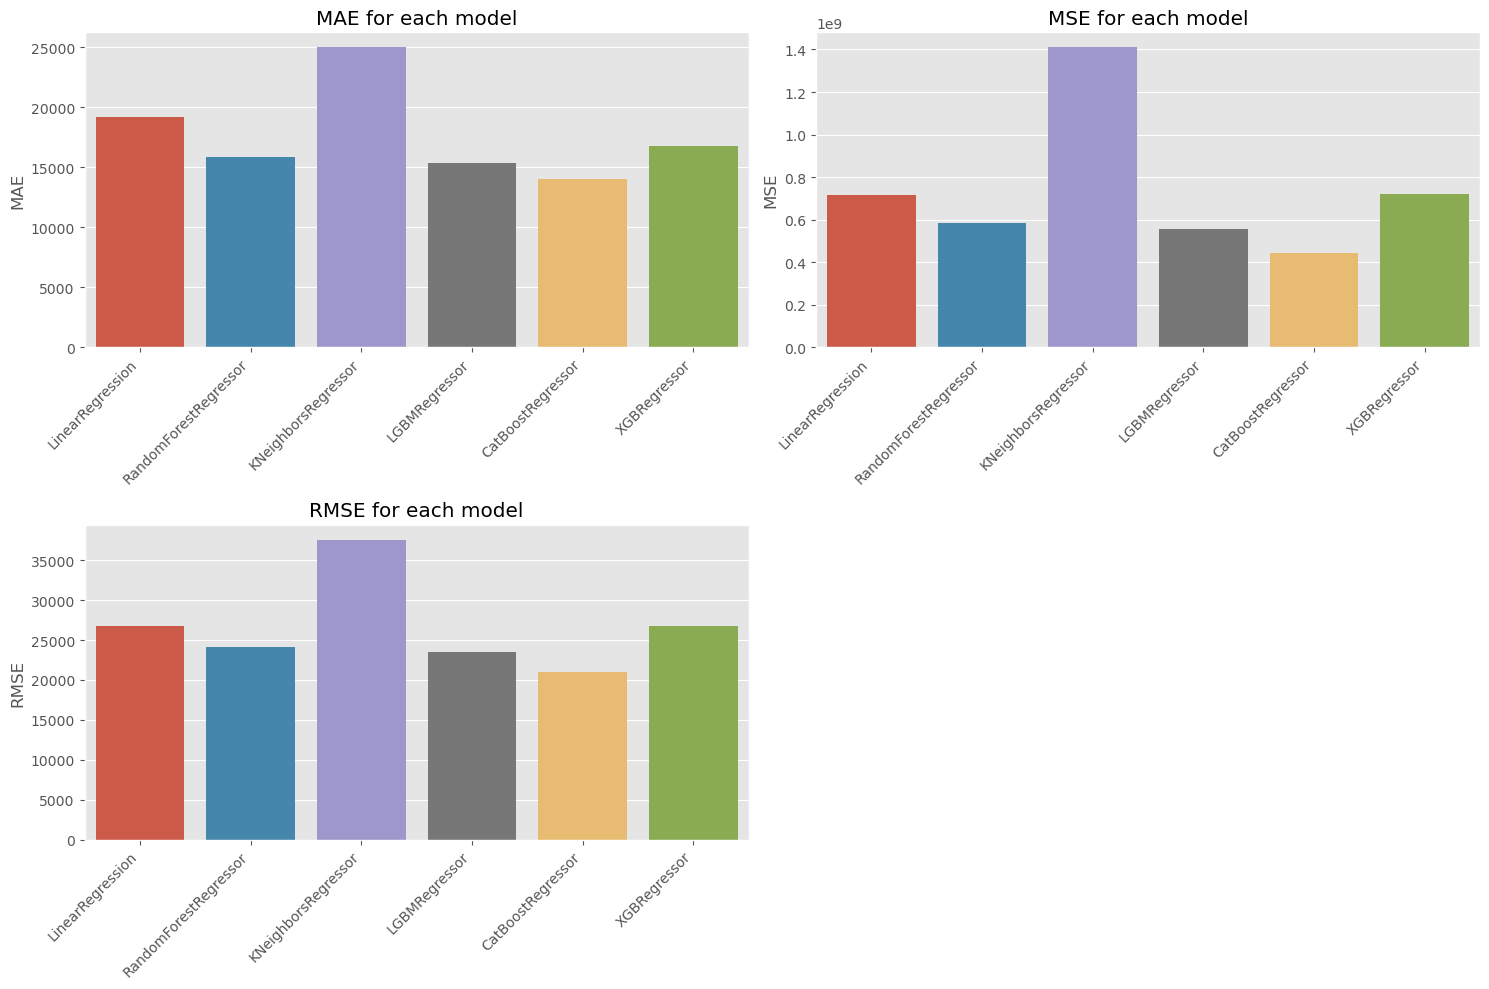

Elapsed time for 'plot_result function': 1.5206453800201416 seconds


In [ ]:
# Plot result for Test dataset
plot_result(TEST_RESULT)

### Observation
* CatBoostRengressor performed well in both train and test set. i.e CatBoostRengressor has the lowest bar due to low scores.

### Feature importance

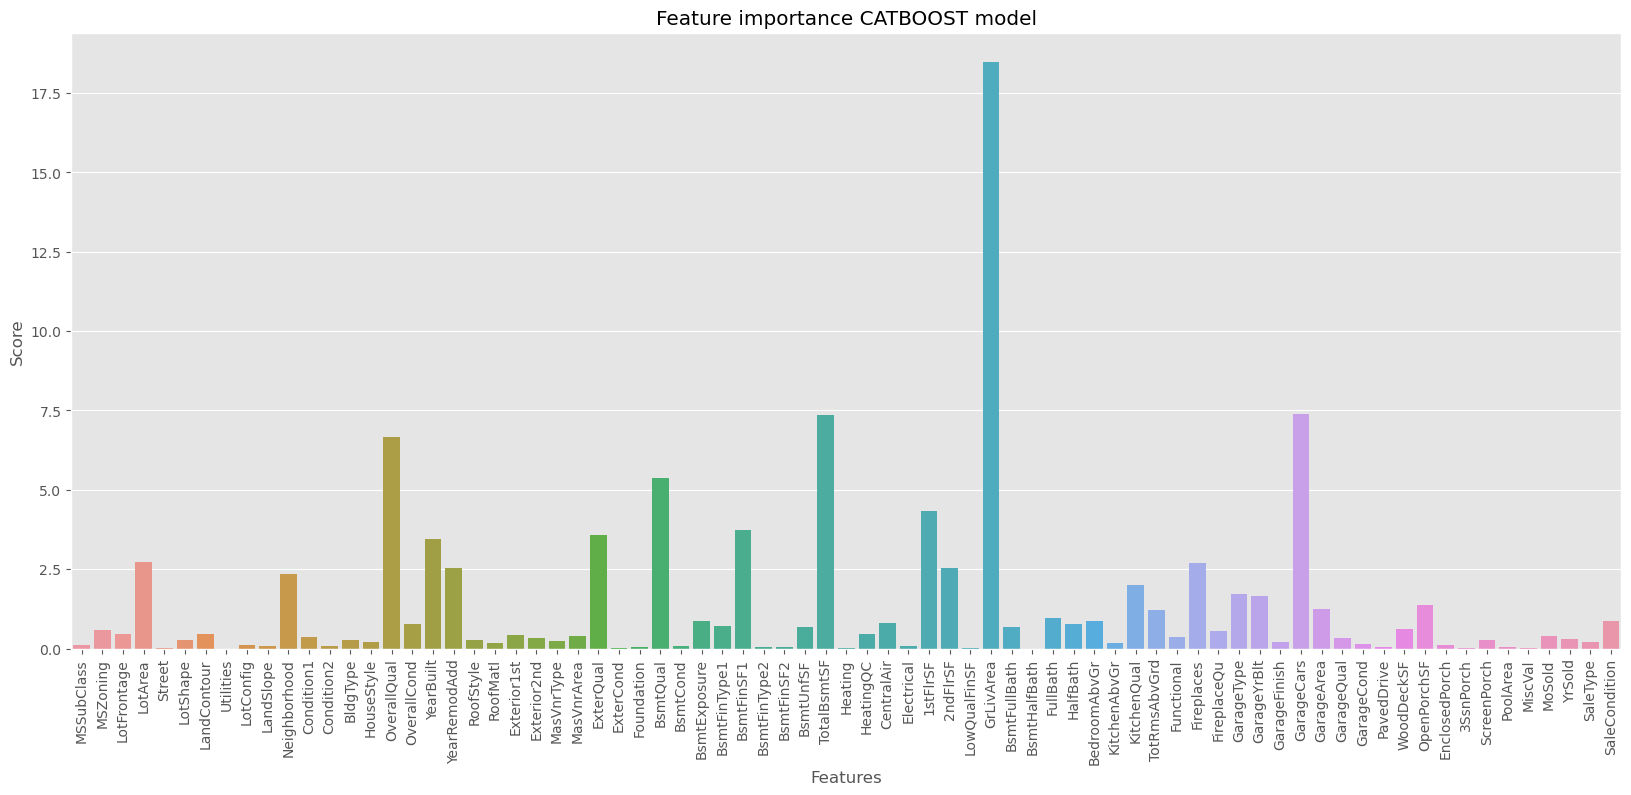

In [ ]:
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x=xtrain.columns, y=trained_model[-2].get_feature_importance())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
barplot.set_title("Feature importance CATBOOST model")
barplot.set_xlabel("Features")
barplot.set_ylabel("Score")
plt.show()

In [ ]:
xtrain.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### KFOLD Cross validation

In [ ]:
import sys
@timer
def kfold_cross_validation(Xtrain, ytrain, n_splits, listofmodels):
    kfold, scorepermodel = KFold(n_splits=n_splits), {}
    for model in listofmodels:
        if model.__name__ in ["XGBRegressor", "LGBMRegressor"]:
            init_model = model(verbosity=0) # Load model
        elif model.__name__ == "CatBoostRegressor":
            init_model = model(logging_level='Silent')
        else:
            init_model = model()# Load model

        desc = f"Training {model.__name__}"
        scoresperfolds = [] # Create a list to store the prediction
        for idx, (train_idx, test_idx) in tqdm(enumerate(kfold.split(Xtrain, ytrain)), total=n_splits, desc=desc):
            x_train, x_test = Xtrain.iloc[train_idx], Xtrain.iloc[test_idx]
            y_train, y_test = ytrain.iloc[train_idx], ytrain.iloc[test_idx]
            # Fit model
            init_model.fit(x_train, y_train)
            # make prediction on test set
            pred = init_model.predict(x_test)
            # model evaluation
            mae = mean_absolute_error(y_test, pred)
            mse = mean_squared_error(y_test, pred)
            rmse = np.sqrt(mean_squared_error(y_test, pred))
            # Store model score in a list
            scoresperfolds.append((mae, mse, rmse))
        # Store each model score in a dictionary
        scorepermodel[model.__name__] = np.mean(scoresperfolds, axis=0)

    return pd.DataFrame(scorepermodel, index=["MAE", "MSE", "RMSE"]).T.reset_index().rename({"index":"model"}, axis="columns")

In [ ]:
kfold_score = kfold_cross_validation(scaled_X, X["SalePrice"], 5, listofmodels)

Training XGBRegressor: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.10it/s]

Elapsed time for 'kfold_cross_validation function': 125.8836727142334 seconds


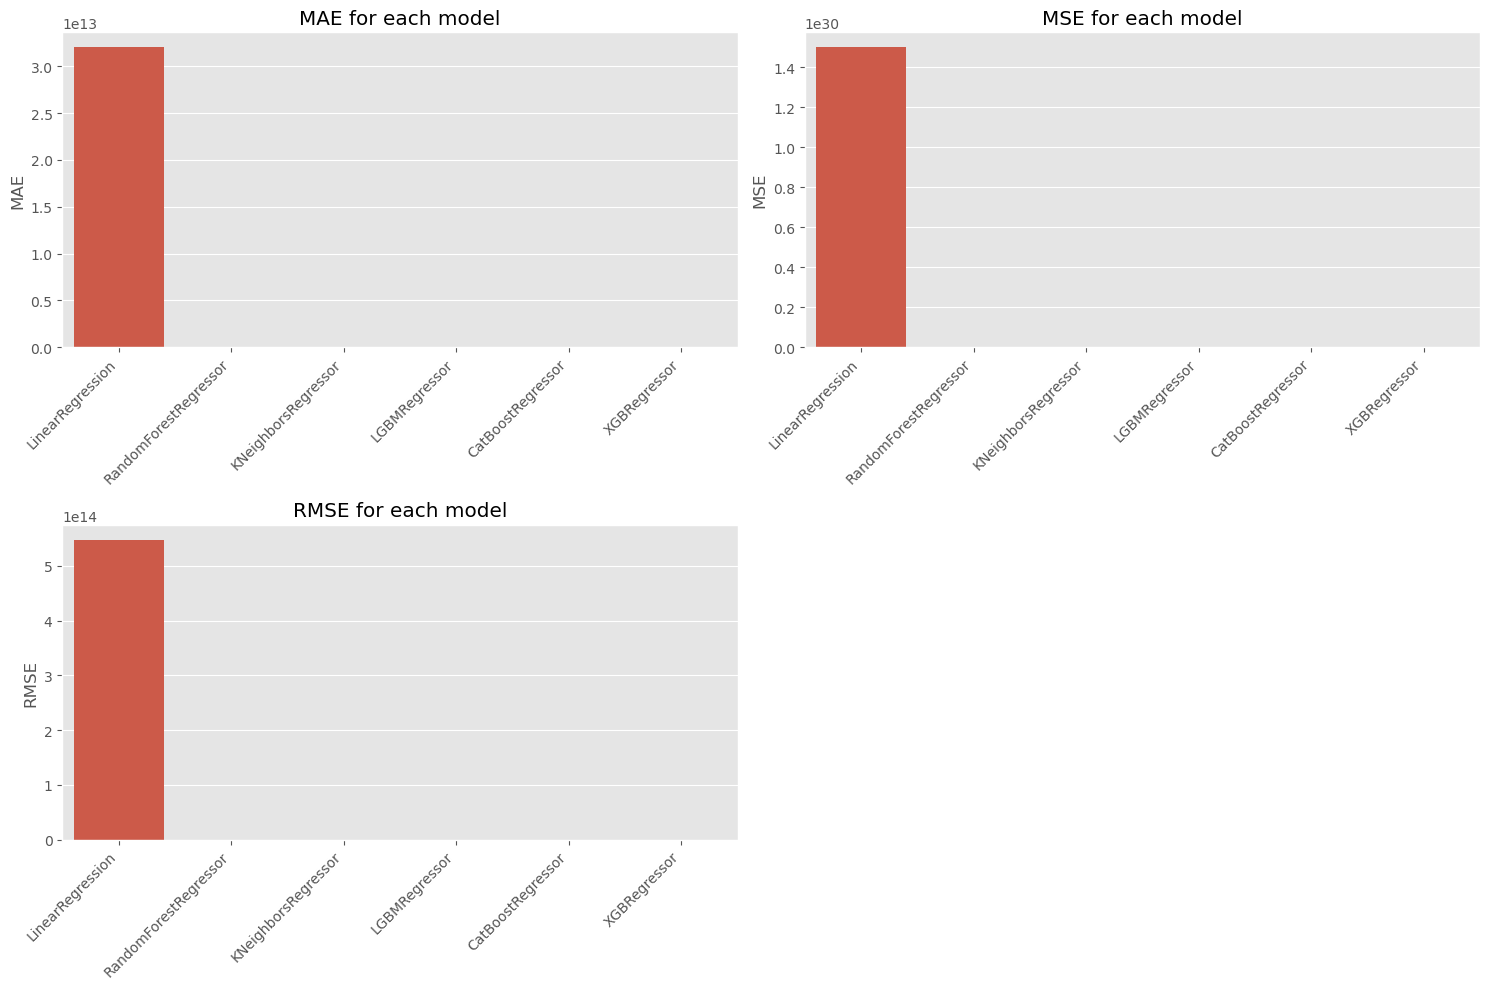

Elapsed time for 'plot_result function': 1.5548064708709717 seconds


In [ ]:
plot_result(kfold_score)

#### Observation
* Linear model appears to perform poorly during cross validation.

In [ ]:
# Grading performance based on the lowest ROOT MEAN SQUARED ERROR
kfold_score.loc[kfold_score["RMSE"].idxmin()]

model    CatBoostRegressor
MAE           15311.744153
MSE       734052538.178919
RMSE          26753.017573
Name: 4, dtype: object

### Hyperparameter optimization

In [ ]:
# Import optimization tools
import optuna
from functools import partial

In [ ]:
@timer
def optimizer(trial, X, y):
    # Set the parameters needed to reduce the RMSE
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    # Load Kfold
    kfold = KFold(n_splits=5)
    # Load the model
    model = CatBoostRegressor(**params, silent=True)

    # Create a list to store the scores
    scoresperfolds = []

    for idx, (train_idx, test_idx) in tqdm(enumerate(kfold.split(X, y)), total=5):
            x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            # Fit model
            model.fit(x_train, y_train, eval_set=[(x_test, y_test)])
            # make prediction on test set
            pred = model.predict(x_test)
            # model evaluation
            rmse = np.sqrt(mean_squared_error(y_test, pred))
            # Store model score in a list
            scoresperfolds.append(rmse)

    return np.mean(scoresperfolds)

partial_optimizer = partial(optimizer, X=scaled_X, y=X["SalePrice"])

study = optuna.create_study(direction="minimize")

[I 2024-01-05 12:25:21,617] A new study created in memory with name: no-name-459328d8-7da4-4c2e-aa38-2eb960bdbaa5


In [ ]:
# Start optimization
study.optimize(partial_optimizer, n_trials=50) # You can adjust the number of trials depending on your preference

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:27<00:00, 29.50s/it]
[I 2024-01-05 12:27:49,156] Trial 0 finished with value: 32996.52990709014 and parameters: {'learning_rate': 0.003750770902018397, 'depth': 8, 'subsample': 0.07505252605361479, 'colsample_bylevel': 0.7787441990617567, 'min_data_in_leaf': 50}. Best is trial 0 with value: 32996.52990709014.


Elapsed time for 'optimizer function': 147.51858949661255 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.14s/it]
[I 2024-01-05 12:27:59,869] Trial 1 finished with value: 28375.25087569718 and parameters: {'learning_rate': 0.08552597922233829, 'depth': 2, 'subsample': 0.5956176860639848, 'colsample_bylevel': 0.3815136571314298, 'min_data_in_leaf': 93}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 10.705631971359253 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.83s/it]
[I 2024-01-05 12:28:24,029] Trial 2 finished with value: 29713.123970238237 and parameters: {'learning_rate': 0.008438759829384218, 'depth': 4, 'subsample': 0.9978031151179036, 'colsample_bylevel': 0.45308422608253374, 'min_data_in_leaf': 60}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 24.160374641418457 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.87s/it]
[I 2024-01-05 12:28:38,389] Trial 3 finished with value: 39842.75344053478 and parameters: {'learning_rate': 0.002544816106387525, 'depth': 2, 'subsample': 0.8699998411251186, 'colsample_bylevel': 0.929698799966412, 'min_data_in_leaf': 32}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 14.357305765151978 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:03<00:00, 48.71s/it]
[I 2024-01-05 12:32:41,972] Trial 4 finished with value: 42141.128362516974 and parameters: {'learning_rate': 0.0016661098943340266, 'depth': 9, 'subsample': 0.3601307928362113, 'colsample_bylevel': 0.7059530908589748, 'min_data_in_leaf': 46}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 243.58079719543457 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.80s/it]
[I 2024-01-05 12:32:56,002] Trial 5 finished with value: 32018.468290276738 and parameters: {'learning_rate': 0.009812786611181817, 'depth': 2, 'subsample': 0.9738352377477433, 'colsample_bylevel': 0.9533671104535046, 'min_data_in_leaf': 21}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 14.026285886764526 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.23s/it]
[I 2024-01-05 12:33:27,152] Trial 6 finished with value: 34005.57354241925 and parameters: {'learning_rate': 0.0031543568428640855, 'depth': 4, 'subsample': 0.2395392576957558, 'colsample_bylevel': 0.8244754188122349, 'min_data_in_leaf': 16}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 31.14770197868347 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.64s/it]
[I 2024-01-05 12:33:35,379] Trial 7 finished with value: 39265.12045908399 and parameters: {'learning_rate': 0.004757077453715159, 'depth': 1, 'subsample': 0.721884633910126, 'colsample_bylevel': 0.6164284204387667, 'min_data_in_leaf': 30}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 8.226730585098267 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.24s/it]
[I 2024-01-05 12:33:46,612] Trial 8 finished with value: 32038.252583596175 and parameters: {'learning_rate': 0.008445739484277941, 'depth': 2, 'subsample': 0.9172106687244865, 'colsample_bylevel': 0.4103352715576441, 'min_data_in_leaf': 4}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 11.21648907661438 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:56<00:00, 47.25s/it]
[I 2024-01-05 12:37:42,899] Trial 9 finished with value: 28787.180431721565 and parameters: {'learning_rate': 0.045149550852278966, 'depth': 9, 'subsample': 0.4266641023628898, 'colsample_bylevel': 0.6599398293635703, 'min_data_in_leaf': 5}. Best is trial 1 with value: 28375.25087569718.


Elapsed time for 'optimizer function': 236.28695511817932 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:29<00:00,  5.88s/it]
[I 2024-01-05 12:38:12,378] Trial 10 finished with value: 27225.351983578574 and parameters: {'learning_rate': 0.09734383161743698, 'depth': 6, 'subsample': 0.6435513511357573, 'colsample_bylevel': 0.12484251198321283, 'min_data_in_leaf': 97}. Best is trial 10 with value: 27225.351983578574.


Elapsed time for 'optimizer function': 29.47478199005127 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.15s/it]
[I 2024-01-05 12:38:38,229] Trial 11 finished with value: 27248.747843322326 and parameters: {'learning_rate': 0.09777644916862692, 'depth': 6, 'subsample': 0.640552547205208, 'colsample_bylevel': 0.09152999231309955, 'min_data_in_leaf': 99}. Best is trial 10 with value: 27225.351983578574.


Elapsed time for 'optimizer function': 25.829094886779785 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.59s/it]
[I 2024-01-05 12:39:01,249] Trial 12 finished with value: 27640.4357767598 and parameters: {'learning_rate': 0.036145938127531516, 'depth': 6, 'subsample': 0.655380079404783, 'colsample_bylevel': 0.06350610554931022, 'min_data_in_leaf': 98}. Best is trial 10 with value: 27225.351983578574.


Elapsed time for 'optimizer function': 23.02021861076355 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.57s/it]
[I 2024-01-05 12:39:24,172] Trial 13 finished with value: 26998.29464665834 and parameters: {'learning_rate': 0.027042025449055013, 'depth': 6, 'subsample': 0.7853858696202661, 'colsample_bylevel': 0.05975393926006571, 'min_data_in_leaf': 78}. Best is trial 13 with value: 26998.29464665834.


Elapsed time for 'optimizer function': 22.92306160926819 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:51<00:00, 10.36s/it]
[I 2024-01-05 12:40:16,085] Trial 14 finished with value: 27538.20566457543 and parameters: {'learning_rate': 0.02468383428225684, 'depth': 7, 'subsample': 0.8411835747018518, 'colsample_bylevel': 0.23141467296402066, 'min_data_in_leaf': 76}. Best is trial 13 with value: 26998.29464665834.


Elapsed time for 'optimizer function': 51.913352251052856 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.72s/it]
[I 2024-01-05 12:40:34,724] Trial 15 finished with value: 27784.99356627562 and parameters: {'learning_rate': 0.022907756461283107, 'depth': 4, 'subsample': 0.7879378252026501, 'colsample_bylevel': 0.22444245488745873, 'min_data_in_leaf': 80}. Best is trial 13 with value: 26998.29464665834.


Elapsed time for 'optimizer function': 18.63861870765686 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.07s/it]
[I 2024-01-05 12:41:00,167] Trial 16 finished with value: 26797.50998899935 and parameters: {'learning_rate': 0.05581627386881279, 'depth': 5, 'subsample': 0.4802784245974983, 'colsample_bylevel': 0.23971972278439907, 'min_data_in_leaf': 80}. Best is trial 16 with value: 26797.50998899935.


Elapsed time for 'optimizer function': 25.41226029396057 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:20<00:00, 40.08s/it]
[I 2024-01-05 12:44:20,606] Trial 17 finished with value: 29841.64998564935 and parameters: {'learning_rate': 0.016093306370327434, 'depth': 10, 'subsample': 0.40332662887598764, 'colsample_bylevel': 0.29232452010533205, 'min_data_in_leaf': 68}. Best is trial 16 with value: 26797.50998899935.


Elapsed time for 'optimizer function': 200.4390242099762 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.84s/it]
[I 2024-01-05 12:44:44,892] Trial 18 finished with value: 26809.522120349575 and parameters: {'learning_rate': 0.05436400528798352, 'depth': 5, 'subsample': 0.4651758717722683, 'colsample_bylevel': 0.17296805569882698, 'min_data_in_leaf': 85}. Best is trial 16 with value: 26797.50998899935.


Elapsed time for 'optimizer function': 24.285300970077515 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:35<00:00,  7.03s/it]
[I 2024-01-05 12:45:20,119] Trial 19 finished with value: 26898.578883542774 and parameters: {'learning_rate': 0.05459038069233038, 'depth': 5, 'subsample': 0.5128776100371305, 'colsample_bylevel': 0.5134767615165886, 'min_data_in_leaf': 86}. Best is trial 16 with value: 26797.50998899935.


Elapsed time for 'optimizer function': 35.21127653121948 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.69s/it]
[I 2024-01-05 12:45:48,621] Trial 20 finished with value: 27136.990500795226 and parameters: {'learning_rate': 0.06065148860446838, 'depth': 5, 'subsample': 0.26918510710566085, 'colsample_bylevel': 0.3115559497331994, 'min_data_in_leaf': 58}. Best is trial 16 with value: 26797.50998899935.


Elapsed time for 'optimizer function': 28.50264024734497 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.23s/it]
[I 2024-01-05 12:46:24,873] Trial 21 finished with value: 26788.212073176594 and parameters: {'learning_rate': 0.05067201601622891, 'depth': 5, 'subsample': 0.5046209968615639, 'colsample_bylevel': 0.5329734920044201, 'min_data_in_leaf': 86}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 36.251304149627686 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.13s/it]
[I 2024-01-05 12:46:50,633] Trial 22 finished with value: 27982.56782011292 and parameters: {'learning_rate': 0.015706652023824378, 'depth': 4, 'subsample': 0.49849605976104006, 'colsample_bylevel': 0.5635949917793978, 'min_data_in_leaf': 69}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 25.755399703979492 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:48<00:00,  9.66s/it]
[I 2024-01-05 12:47:39,013] Trial 23 finished with value: 26910.24035821758 and parameters: {'learning_rate': 0.03616089300434749, 'depth': 7, 'subsample': 0.31402732977411424, 'colsample_bylevel': 0.21880133149649103, 'min_data_in_leaf': 86}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 48.3635835647583 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.51s/it]
[I 2024-01-05 12:47:51,660] Trial 24 finished with value: 27501.53118709835 and parameters: {'learning_rate': 0.06403400296367717, 'depth': 3, 'subsample': 0.4796419841557442, 'colsample_bylevel': 0.1603640699687401, 'min_data_in_leaf': 88}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 12.64689016342163 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.28s/it]
[I 2024-01-05 12:48:23,135] Trial 25 finished with value: 27176.47428043327 and parameters: {'learning_rate': 0.016550094992208077, 'depth': 5, 'subsample': 0.16997168540341234, 'colsample_bylevel': 0.34252199061888833, 'min_data_in_leaf': 69}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 31.475321054458618 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:16<00:00, 15.21s/it]
[I 2024-01-05 12:49:39,268] Trial 26 finished with value: 27046.99287565485 and parameters: {'learning_rate': 0.03794278654942764, 'depth': 7, 'subsample': 0.5734074618294939, 'colsample_bylevel': 0.5023582091349087, 'min_data_in_leaf': 58}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 76.12765574455261 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.52s/it]
[I 2024-01-05 12:49:51,942] Trial 27 finished with value: 27443.249695220882 and parameters: {'learning_rate': 0.06787012422606577, 'depth': 3, 'subsample': 0.4290860708305011, 'colsample_bylevel': 0.18032236638430338, 'min_data_in_leaf': 77}. Best is trial 21 with value: 26788.212073176594.


Elapsed time for 'optimizer function': 12.670554876327515 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:33<00:00,  6.68s/it]
[I 2024-01-05 12:50:25,426] Trial 28 finished with value: 26378.195973333794 and parameters: {'learning_rate': 0.04808484425363058, 'depth': 5, 'subsample': 0.5581303504041594, 'colsample_bylevel': 0.450624914714858, 'min_data_in_leaf': 86}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 33.47794151306152 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:31<00:00, 30.38s/it]
[I 2024-01-05 12:52:57,424] Trial 29 finished with value: 49149.23558834518 and parameters: {'learning_rate': 0.0011226846072025975, 'depth': 8, 'subsample': 0.09687427628165152, 'colsample_bylevel': 0.7442325473583327, 'min_data_in_leaf': 48}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 151.98131012916565 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.32s/it]
[I 2024-01-05 12:53:14,120] Trial 30 finished with value: 31783.9129058156 and parameters: {'learning_rate': 0.00580773548236421, 'depth': 3, 'subsample': 0.5423185523149555, 'colsample_bylevel': 0.4420335648913064, 'min_data_in_leaf': 93}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 16.693084001541138 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.35s/it]
[I 2024-01-05 12:53:50,953] Trial 31 finished with value: 26857.304077285335 and parameters: {'learning_rate': 0.04592553491146999, 'depth': 5, 'subsample': 0.47688527379321893, 'colsample_bylevel': 0.5641334620386255, 'min_data_in_leaf': 84}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 36.83166766166687 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.43s/it]
[I 2024-01-05 12:54:18,180] Trial 32 finished with value: 27002.719704251504 and parameters: {'learning_rate': 0.07406552317290391, 'depth': 5, 'subsample': 0.3569884920798983, 'colsample_bylevel': 0.26693053538855405, 'min_data_in_leaf': 91}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 27.222978830337524 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.58s/it]
[I 2024-01-05 12:54:41,527] Trial 33 finished with value: 27470.979729051603 and parameters: {'learning_rate': 0.03176318007241744, 'depth': 4, 'subsample': 0.7105767578192235, 'colsample_bylevel': 0.3685385849357462, 'min_data_in_leaf': 73}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 23.341711282730103 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:49<00:00,  9.84s/it]
[I 2024-01-05 12:55:30,817] Trial 34 finished with value: 27055.474614886334 and parameters: {'learning_rate': 0.0489404958354083, 'depth': 6, 'subsample': 0.5810976204936922, 'colsample_bylevel': 0.4759387950159805, 'min_data_in_leaf': 63}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 49.2860643863678 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.51s/it]
[I 2024-01-05 12:56:38,437] Trial 35 finished with value: 27669.782617416367 and parameters: {'learning_rate': 0.08086061065452868, 'depth': 7, 'subsample': 0.4559860314635843, 'colsample_bylevel': 0.39941266173493967, 'min_data_in_leaf': 81}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 67.6180899143219 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.66s/it]
[I 2024-01-05 12:57:21,804] Trial 36 finished with value: 27265.040700389665 and parameters: {'learning_rate': 0.01906359803549106, 'depth': 5, 'subsample': 0.37336131789553495, 'colsample_bylevel': 0.8224211997782627, 'min_data_in_leaf': 92}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 43.36384105682373 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.48s/it]
[I 2024-01-05 12:57:49,301] Trial 37 finished with value: 28519.777344526206 and parameters: {'learning_rate': 0.012069066553147184, 'depth': 4, 'subsample': 0.5618409239538815, 'colsample_bylevel': 0.6164848129319769, 'min_data_in_leaf': 39}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 27.491016387939453 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.03s/it]
[I 2024-01-05 12:58:04,509] Trial 38 finished with value: 27890.19365495289 and parameters: {'learning_rate': 0.04356105938851993, 'depth': 3, 'subsample': 0.6225816223458365, 'colsample_bylevel': 0.33084255751838587, 'min_data_in_leaf': 73}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 15.192659139633179 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.70s/it]
[I 2024-01-05 12:59:03,103] Trial 39 finished with value: 28000.41235010092 and parameters: {'learning_rate': 0.029353367840970347, 'depth': 8, 'subsample': 0.3361114153865078, 'colsample_bylevel': 0.14007353859320681, 'min_data_in_leaf': 53}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 58.59444451332092 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.64s/it]
[I 2024-01-05 12:59:26,346] Trial 40 finished with value: 27345.976005841214 and parameters: {'learning_rate': 0.056202283202025555, 'depth': 4, 'subsample': 0.5188850314848255, 'colsample_bylevel': 0.4359029643568215, 'min_data_in_leaf': 82}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 23.24287176132202 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.20s/it]
[I 2024-01-05 13:00:02,436] Trial 41 finished with value: 27136.925141180138 and parameters: {'learning_rate': 0.044267087158371785, 'depth': 5, 'subsample': 0.45847138232122053, 'colsample_bylevel': 0.532340157414951, 'min_data_in_leaf': 85}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 36.089773178100586 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.61s/it]
[I 2024-01-05 13:00:40,556] Trial 42 finished with value: 27686.050331316113 and parameters: {'learning_rate': 0.0861155076257109, 'depth': 5, 'subsample': 0.4065787382338747, 'colsample_bylevel': 0.6219099454267241, 'min_data_in_leaf': 88}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 38.119765281677246 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.63s/it]
[I 2024-01-05 13:01:38,775] Trial 43 finished with value: 27070.630430351554 and parameters: {'learning_rate': 0.0514256414777156, 'depth': 6, 'subsample': 0.5965415298538035, 'colsample_bylevel': 0.6679603961181985, 'min_data_in_leaf': 93}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 58.203596353530884 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:26<00:00,  5.24s/it]
[I 2024-01-05 13:02:05,069] Trial 44 finished with value: 26997.883219171526 and parameters: {'learning_rate': 0.0707935800721237, 'depth': 4, 'subsample': 0.6923620259438457, 'colsample_bylevel': 0.5635421068854685, 'min_data_in_leaf': 64}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 26.29310965538025 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.76s/it]
[I 2024-01-05 13:02:58,994] Trial 45 finished with value: 26884.9977479654 and parameters: {'learning_rate': 0.036685603355956296, 'depth': 6, 'subsample': 0.29170878152533786, 'colsample_bylevel': 0.5582317545311152, 'min_data_in_leaf': 83}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 53.92322015762329 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:41<00:00,  8.37s/it]
[I 2024-01-05 13:03:40,951] Trial 46 finished with value: 27120.714920173043 and parameters: {'learning_rate': 0.021215243394062253, 'depth': 5, 'subsample': 0.4737030677437009, 'colsample_bylevel': 0.7397341467207404, 'min_data_in_leaf': 73}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 41.95725440979004 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.59s/it]
[I 2024-01-05 13:03:49,050] Trial 47 finished with value: 31021.668518928556 and parameters: {'learning_rate': 0.02849215127712619, 'depth': 1, 'subsample': 0.5350922599377328, 'colsample_bylevel': 0.4800361891288736, 'min_data_in_leaf': 96}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 8.097967863082886 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:26<00:00,  5.37s/it]
[I 2024-01-05 13:04:16,041] Trial 48 finished with value: 30028.742527041275 and parameters: {'learning_rate': 0.006424520673704113, 'depth': 6, 'subsample': 0.42763173556897904, 'colsample_bylevel': 0.10635187555099594, 'min_data_in_leaf': 89}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 26.99033832550049 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.17s/it]
[I 2024-01-05 13:04:47,030] Trial 49 finished with value: 27316.33479528267 and parameters: {'learning_rate': 0.09255976992673107, 'depth': 4, 'subsample': 0.6741272355158128, 'colsample_bylevel': 0.8913000144722998, 'min_data_in_leaf': 98}. Best is trial 28 with value: 26378.195973333794.


Elapsed time for 'optimizer function': 30.983473300933838 seconds


In [ ]:
print("Best Parameters: ",study.best_params)
print("\nBest RMSE on test set: ",study.best_value)

Best Parameters:  {'learning_rate': 0.04808484425363058, 'depth': 5, 'subsample': 0.5581303504041594, 'colsample_bylevel': 0.450624914714858, 'min_data_in_leaf': 86}

Best RMSE on test set:  26378.195973333794


### Make predictions on test dataset

In [ ]:
@timer
def make_prediction(X, y, x_val, n_splits, best_params):
    # Initialize Kfold
    kfold = KFold(n_splits=n_splits)
    # load model
    model = CatBoostRegressor(**best_params, silent=True)

    predPerFold = pd.DataFrame() # Create a dataframe to store prediction made per folds
    for idx, (train_idx, test_idx) in tqdm(enumerate(kfold.split(X, y)), total=n_splits):
        xtrain, xtest = X.loc[train_idx], X.loc[test_idx]
        ytrain, ytest = y.iloc[train_idx], y.iloc[test_idx]
        # Train the model
        model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])
        # Make prediction on test set
        pred = model.predict(x_val)
        # Store each predictions
        predPerFold[f"fold{idx+1}"] = pred

    return pd.DataFrame(predPerFold.mean(axis="columns")).rename({0:"Predictions"}, axis="columns")

In [ ]:
test_predictions = make_prediction(scaled_X, X["SalePrice"], scaled_x, 5, study.best_params)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:34<00:00,  6.86s/it]

Elapsed time for 'make_prediction function': 34.33255743980408 seconds


In [ ]:
test_predictions

,Predictions
0,126284.294827
1,164179.183715
2,189121.735659
3,195616.727204
4,180566.212047
...,...
1454,87173.144993
1455,87067.069143
1456,169226.032941
1457,122429.115793
